In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# If the CSV is uploaded to Colab (files section)
df = pd.read_csv("paysim dataset.csv")

df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
# Cleanning Column names
df.columns = df.columns.str.lower().str.strip()
df.head()


,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# Fix Transaction type column convert to category

df['type'] = df['type'].astype('category')
df['type'].value_counts()


,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [9]:
# Encode Fraud Label
df['isfraud'].value_counts()


,count
isfraud,
0,6354407
1,8213


In [10]:
# Dropping Columns
# nameorig and namedest are random id's not useful
df = df.drop(['nameorig', 'namedest'], axis=1)


In [11]:
# Encode Transaction Type
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()


,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [12]:
# checking clean dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceorg   float64
 3   newbalanceorig  float64
 4   oldbalancedest  float64
 5   newbalancedest  float64
 6   isfraud         int64  
 7   isflaggedfraud  int64  
 8   type_CASH_OUT   bool   
 9   type_DEBIT      bool   
 10  type_PAYMENT    bool   
 11  type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 412.6 MB


In [13]:
# Detect Duplicates
df.duplicated().sum()


np.int64(543)

In [14]:
df = df.drop_duplicates()


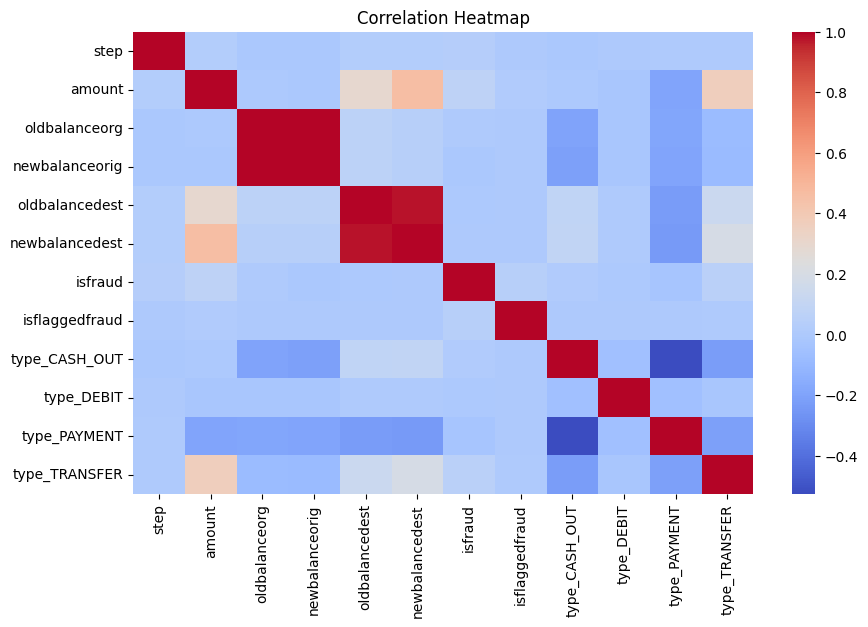

In [15]:
# Correlation Analysis

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Checking Class Imbalance
df['isfraud'].value_counts(normalize=True)


,proportion
isfraud,
0,0.998712
1,0.001288


In [17]:
# Saving the clean Dataset
df.to_csv("/content/paysim_clean.csv", index=False)


# **EDA (Exploratory Data Analysis)**

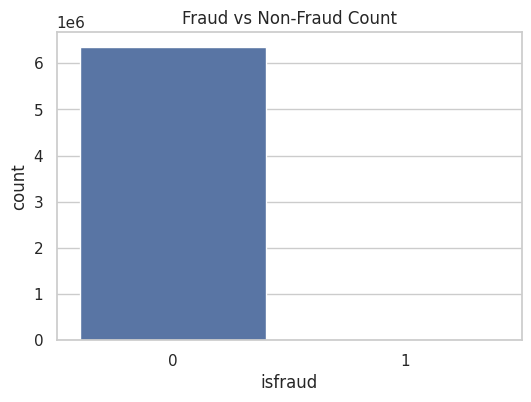

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='isfraud', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()



Transaction Type Distribution

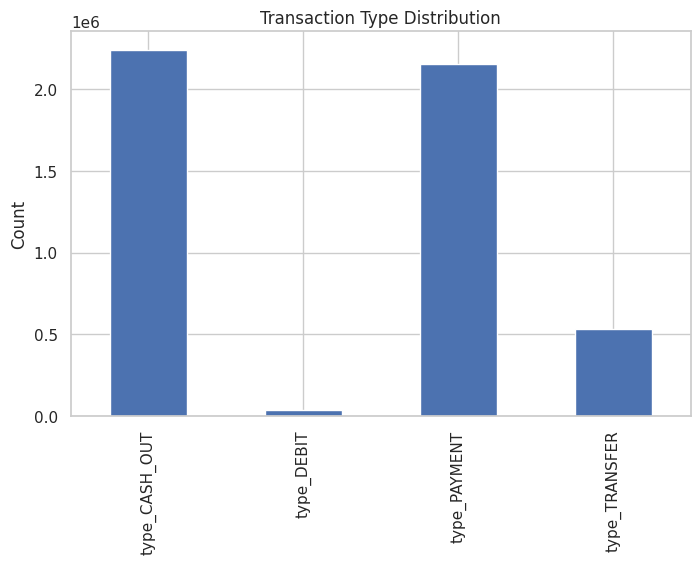

In [19]:
# Distribution of Transaction type

type_cols = ['type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']

df[type_cols].sum().plot(kind='bar', figsize=(8,5))
plt.title("Transaction Type Distribution")
plt.ylabel("Count")
plt.show()


Fraud by Transaction Type

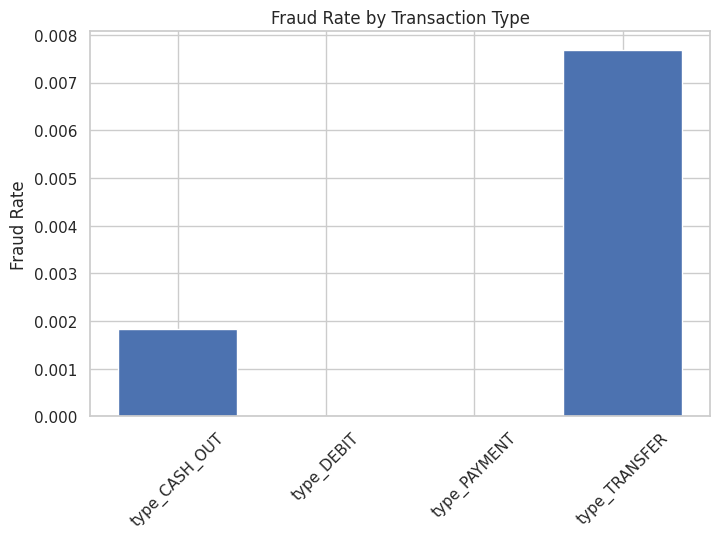

In [20]:
# Fraud by Transaction Type
fraud_by_type = {}

for col in type_cols:
    fraud_by_type[col] = df[df[col] == True]['isfraud'].mean()

plt.figure(figsize=(8,5))
plt.bar(fraud_by_type.keys(), fraud_by_type.values())
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()


Amount Distribution (Fraud vs Non-Fraud)

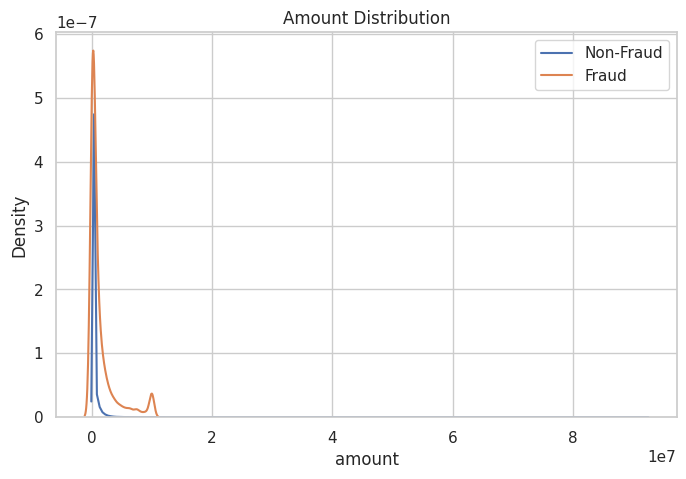

In [21]:
# Amount Distribution (Fraud vs Non-Fraud)
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['isfraud']==0]['amount'], label='Non-Fraud')
sns.kdeplot(df[df['isfraud']==1]['amount'], label='Fraud')
plt.title("Amount Distribution")
plt.legend()
plt.show()

#  Fraud tends to involve large amounts

Boxplot of Amount by Fraud

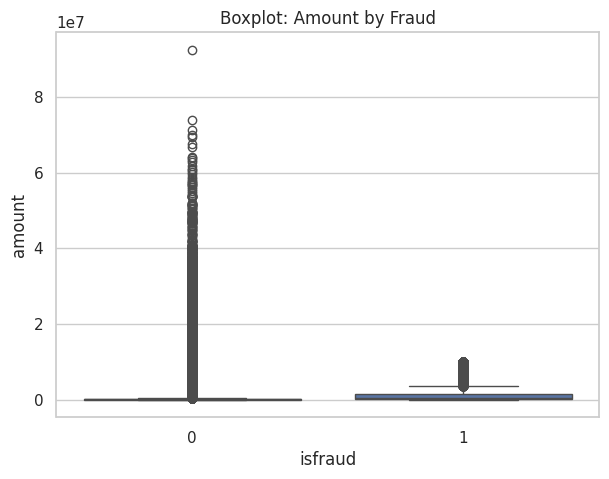

In [22]:
# Boxplot of Amount by Fraud
plt.figure(figsize=(7,5))
sns.boxplot(x='isfraud', y='amount', data=df)
plt.title("Boxplot: Amount by Fraud")
plt.show()


Correlation Heatmap

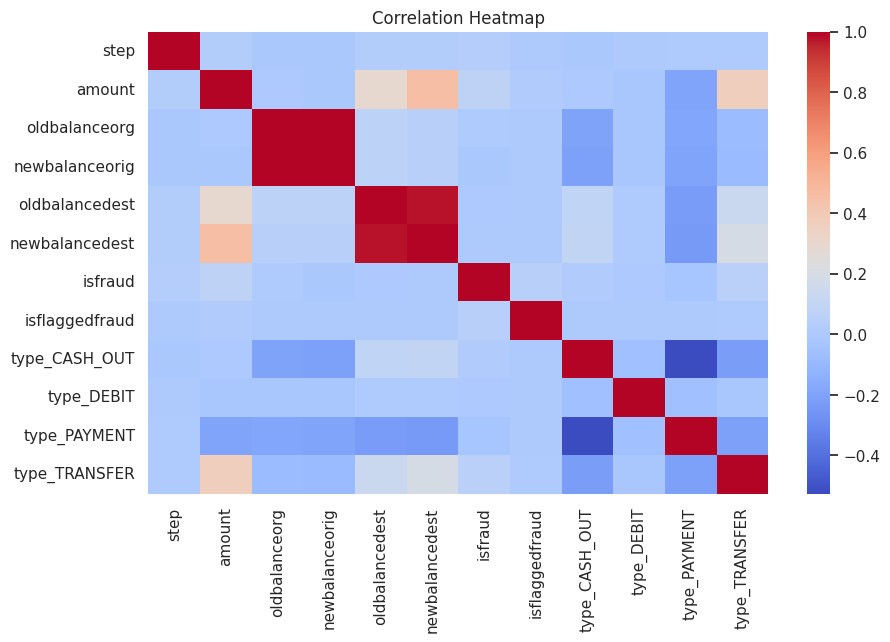

In [23]:
df_corr = df.copy()
df_corr[type_cols] = df_corr[type_cols].astype(int)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Feature Engineering Check: Balance Error

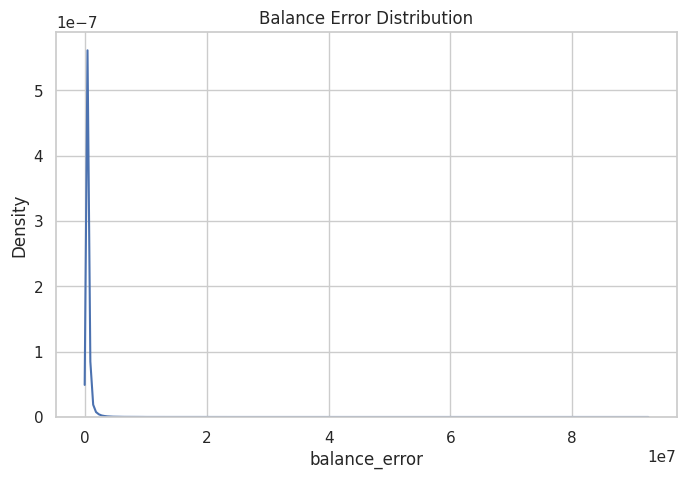

In [24]:
#
df['balance_error'] = df['newbalanceorig'] + df['amount'] - df['oldbalanceorg']

plt.figure(figsize=(8,5))
sns.kdeplot(df['balance_error'])
plt.title("Balance Error Distribution")
plt.show()


Fraud Across Steps

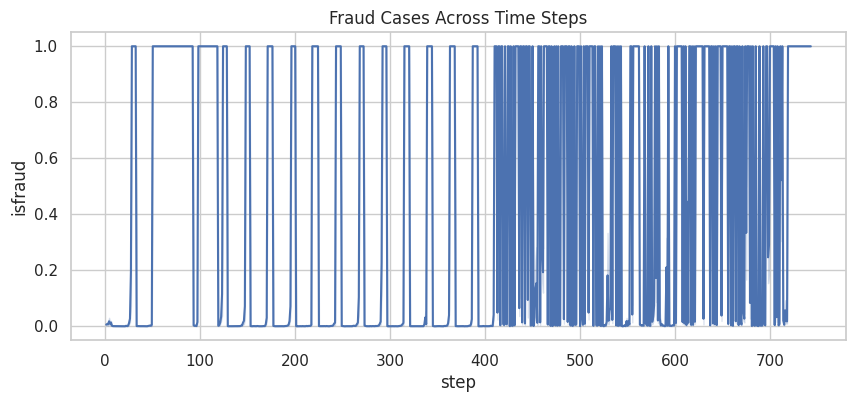

In [25]:
# Fraud Across Steps
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='step', y='isfraud')
plt.title("Fraud Cases Across Time Steps")
plt.show()


# **Feature Engineering**

In [26]:
# 1. Origin Account Error (most predictive)
df['org_error'] = df['oldbalanceorg'] - df['newbalanceorig'] - df['amount']


In [27]:
 # 2. Destination Account Error (2nd most predictive)
df['dest_error'] = df['newbalancedest'] - df['oldbalancedest'] - df['amount']


In [28]:
# 3. Amount Ratio (how large the transaction is relative to balance)
df['amount_over_oldbalance'] = df['amount'] / (df['oldbalanceorg'] + 1)


In [29]:
# 4. Origin Balance Difference (captures drained accounts)
df['org_balance_diff'] = df['oldbalanceorg'] - df['newbalanceorig']


In [30]:
# 5. Transaction Type × Amount (high fraud in TRANSFER & CASH_OUT)
df['type_CASH_OUT_amount'] = df['type_CASH_OUT'].astype(int) * df['amount']
df['type_TRANSFER_amount'] = df['type_TRANSFER'].astype(int) * df['amount']

In [31]:
important_features = [
    'org_error',
    'dest_error',
    'amount_over_oldbalance',
    'org_balance_diff',
    'type_CASH_OUT_amount',
    'type_TRANSFER_amount'
]

df_fe = df.copy()  # final dataset with all features

print("Feature Engineering Completed ✔")
print("Created features:", important_features)

Feature Engineering Completed ✔
Created features: ['org_error', 'dest_error', 'amount_over_oldbalance', 'org_balance_diff', 'type_CASH_OUT_amount', 'type_TRANSFER_amount']


# **Train–Test Split**

In [32]:
from sklearn.model_selection import train_test_split

X = df_fe.drop('isfraud', axis=1)
y = df_fe['isfraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5089661, 18)
Test shape: (1272416, 18)


Handle Imbalance Using Class Weights

In [33]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

weights = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", weights)


Class Weights: {0: np.float64(0.5006450784097823), 1: np.float64(388.0497865202806)}



Training XGBoost...

AUC: 0.9997549682438767

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270777
           1       0.92      1.00      0.96      1639

    accuracy                           1.00   1272416
   macro avg       0.96      1.00      0.98   1272416
weighted avg       1.00      1.00      1.00   1272416


Confusion Matrix:
[[1270638     139]
 [      4    1635]]


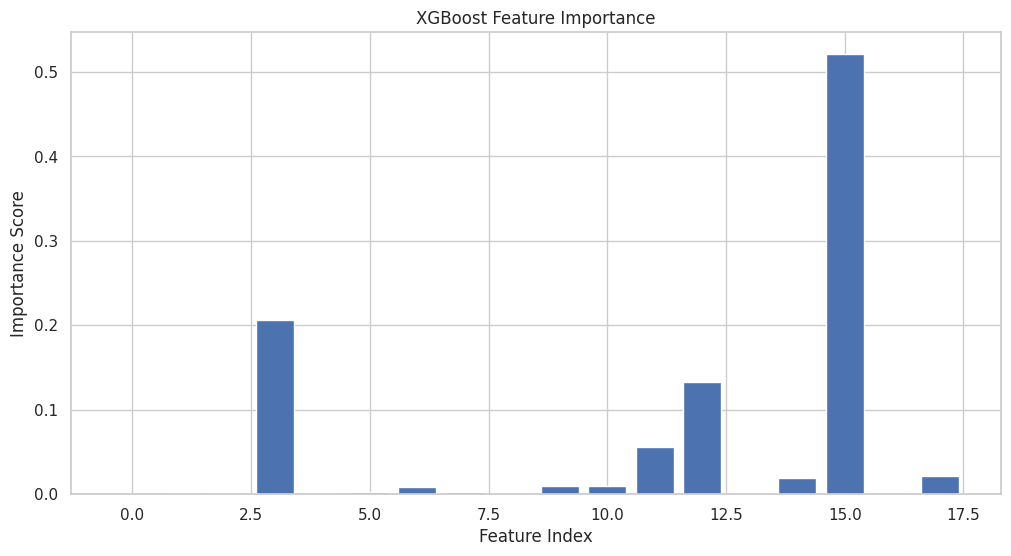

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. SCALE FEATURES (good for boosting models)
# ----------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 2. CLASS IMBALANCE HANDLING
# ----------------------------------------------------
scale_pos_weight = 388.0497865202806   # from your class imbalance calculation

# ----------------------------------------------------
# 3. XGBOOST MODEL
# ----------------------------------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",     # FASTEST for large dataset (5M rows)
    random_state=42
)

print("\nTraining XGBoost...")
xgb.fit(X_train_scaled, y_train)

# ----------------------------------------------------
# 4. PREDICTIONS & METRICS
# ----------------------------------------------------
y_pred = xgb.predict(X_test_scaled)
y_prob = xgb.predict_proba(X_test_scaled)[:, 1]

print("\nAUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ----------------------------------------------------
# 5. FEATURE IMPORTANCE
# ----------------------------------------------------
plt.figure(figsize=(12, 6))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


In [37]:
!pip install catboost


['Collecting catboost',
 '  Downloading catboost-1.2.8-cp312-cp312-manylinux2014_x86_64.whl.metadata (1.2 kB)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.12/dist-packages (from catboost) (0.21)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.12/dist-packages (from catboost) (3.10.0)',
 'Requirement already satisfied: numpy<3.0,>=1.16.0 in /usr/local/lib/python3.12/dist-packages (from catboost) (2.0.2)',
 'Requirement already satisfied: pandas>=0.24 in /usr/local/lib/python3.12/dist-packages (from catboost) (2.2.2)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.12/dist-packages (from catboost) (1.16.3)',
 'Requirement already satisfied: plotly in /usr/local/lib/python3.12/dist-packages (from catboost) (5.24.1)',
 'Requirement already satisfied: six in /usr/local/lib/python3.12/dist-packages (from catboost) (1.17.0)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.12/dist-packages (fr

Training CatBoost...
0:	total: 1.26s	remaining: 10m 31s
100:	total: 2m 2s	remaining: 8m 4s
200:	total: 4m 6s	remaining: 6m 7s
300:	total: 6m 2s	remaining: 3m 59s
400:	total: 7m 41s	remaining: 1m 53s
499:	total: 9m 13s	remaining: 0us

AUC Score: 0.9997902790640736

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270777
           1       0.98      1.00      0.99      1639

    accuracy                           1.00   1272416
   macro avg       0.99      1.00      1.00   1272416
weighted avg       1.00      1.00      1.00   1272416


Confusion Matrix:
[[1270750      27]
 [      4    1635]]


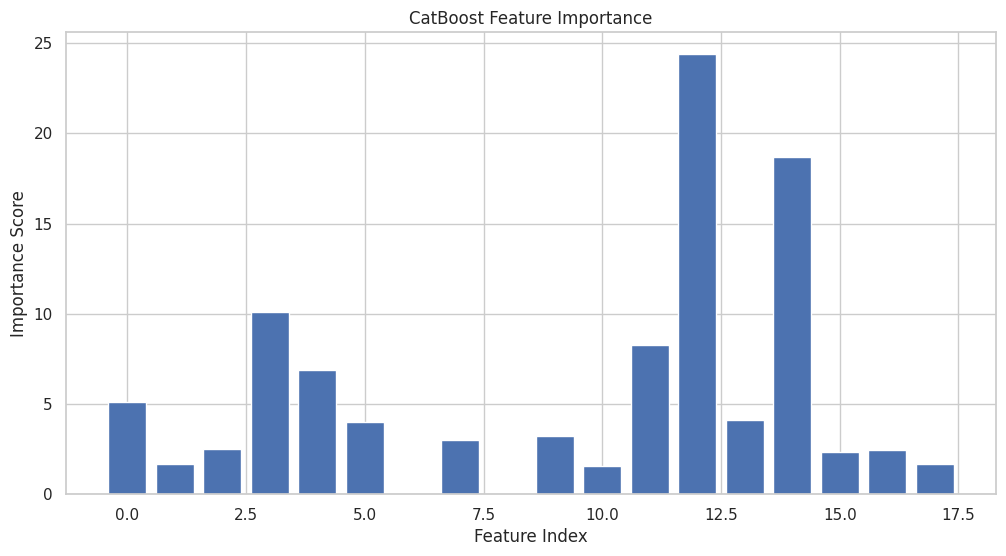

In [38]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------
# Class Imbalance Handling
# -------------------------------
scale_pos_weight = 388.0497865202806  # your computed weight for fraud

# -------------------------------
# Train CatBoost
# -------------------------------
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='AUC',
    class_weights=[1, scale_pos_weight],   # weight 0,1
    random_seed=42,
    verbose=100
)

print("Training CatBoost...")
cat_model.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = cat_model.predict(X_test)
y_prob = cat_model.predict_proba(X_test)[:, 1]

# -------------------------------
# Evaluation
# -------------------------------
print("\nAUC Score:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -------------------------------
# Feature Importance
# -------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(len(cat_model.feature_importances_)), cat_model.feature_importances_)
plt.title("CatBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()
